In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import requests
from more_itertools import pairwise

In [2]:
#загрузка датасетов
b_games = pd.read_feather('bgg_boardgames_top_2000.feather')
ratings = pd.read_feather('bgg_ratings_top_2000.feather')

===== Board Games =====
====================

boardgame_id - board game id <br>
title - title of board game <br>
year_published - year of publication of the board game <br>
minplayers - minimum number of players per game <br>
maxplayers - maximum number of players per game <br>
minplaytime - minimum playing time per game <br>
maxplaytime - maximum playing time per game <br>
age - lower age limit for playing <br>
users_rated - number of users who rated a game <br>
average_rating - average rating <br>
bayes_average_rating - bayes average rating <br>
median - median rating <br>
stddev - standard deviation of rating <br>
owned - number of users who have a game <br>
trading - number of users who selling a game <br>
wishing - number of users who want to get a game <br>
num_of_comments - number of comments <br>
num_of_weights - number of scores for weight <br>
average_weight - average weight of game <br>
ranks - game ranks <br>
main_publisher - main publisher <br>
description - description of the game <br>
publishers - all publishers <br>
honors - all honors <br>
expansions - all expansions <br>
accessories - all accessories <br>
artists - all artists <br>
mechanics - used mechanics <br>
category - category ща пфьуы <br>
designers - all designers <br>
graphic_designers - all graphic designers <br>
subdomains - subdomains of categories <br>
implementations - all implementations <br>
suggested_numplayers - proposed number of players <br>
podcast_episodes - all podcast episodes <br>
comments - some comments <br>
marketplace_history - marketplace history <br>
thumbnail_link - thumbnail link <br>
image_link - image link <br>

===== Ratings =====
================

nickname - user's nickname <br>
title - title of the game <br>
boardgame_id - id of the board game <br>
rating - given rating <br>
num_of_plays - number of games played by the user <br>
comment - comment fot rating <br>
own - flag whether the user owns the game <br>
prevowned - flag of whether the user has previously owned the game <br>
fortrade - flag whether the user is selling the game <br>
want - flag whether the user want the game <br>
wanttoplay - flag whether the user want to play the game <br>
wanttobuy - flag whether the user want to buy the game <br>
wishlist - flag whether the user have the game in wishlist <br>
preordered - flag whether the user preordered the game <br>
last_modified - date of last modification <br>

In [3]:
#Оглавление

In [4]:
b_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   boardgame_id          1999 non-null   int32  
 1   title                 1999 non-null   object 
 2   year_published        1999 non-null   Int16  
 3   minplayers            1999 non-null   Int8   
 4   maxplayers            1999 non-null   Int16  
 5   minplaytime           1999 non-null   Int32  
 6   maxplaytime           1999 non-null   Int32  
 7   age                   1999 non-null   Int16  
 8   users_rated           1999 non-null   Int32  
 9   average_rating        1999 non-null   float32
 10  bayes_average_rating  1999 non-null   float32
 11  median                1999 non-null   float32
 12  stddev                1999 non-null   float32
 13  owned                 1999 non-null   Int32  
 14  trading               1999 non-null   Int16  
 15  wishing              

In [5]:
#удаляем столбец, где слишком мало значений
b_games.drop('graphic_designers', axis = 1, inplace=True)

In [6]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003471 entries, 0 to 1003470
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   nickname       1003471 non-null  object 
 1   title          1003471 non-null  object 
 2   boardgame_id   1003471 non-null  int64  
 3   rating         1003402 non-null  float64
 4   num_of_plays   1003471 non-null  int64  
 5   comment        263604 non-null   object 
 6   own            1003471 non-null  int64  
 7   prevowned      1003471 non-null  int64  
 8   fortrade       1003471 non-null  int64  
 9   want           1003471 non-null  int64  
 10  wanttoplay     1003471 non-null  int64  
 11  wanttobuy      1003471 non-null  int64  
 12  wishlist       1003471 non-null  int64  
 13  preordered     1003471 non-null  int64  
 14  last_modified  1003471 non-null  object 
dtypes: float64(1), int64(10), object(4)
memory usage: 114.8+ MB


In [7]:
b_games.head()

,boardgame_id,title,year_published,minplayers,maxplayers,minplaytime,maxplaytime,age,users_rated,average_rating,...,category,designers,subdomains,implementations,suggested_numplayers,podcast_episodes,comments,marketplace_history,thumbnail_link,image_link
0,77423,The Lord of the Rings: The Card Game,2011,1,2,30,60,13,23231,7.66006,...,Adventure|Card Game|Collectible Components|Fan...,Nate French,Customizable Games,The Lord of the Rings: The Card Game – Revised...,1||Best~221|Recommended~368|Not Recommended~45...,005 – Emergent Narrative &amp; Storytelling in...,"0 1 1 2 3 5 8|Recommended by Joel D., Chris S....",unix_saledate|1301347058||saletime|120837||pri...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...,https://cf.geekdo-images.com/ZmXi5BbtoWl58ZnKc...
1,88,Torres,1999,2,4,60,60,12,9398,7.09677,...,Abstract Strategy|Medieval,Michael Kiesling|Wolfgang Kramer,Abstract Games|Strategy Games,Torres Family|Burgenland,1||Best~0|Recommended~0|Not Recommended~71|||2...,"BGTG 115 - Spiel des Jahres, Then &amp; Now|BG...",-Johnny-|One play. Didn't do it for me at all....,unix_saledate|1047560215||saletime|9025580||pr...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...,https://cf.geekdo-images.com/3pL0cEnaGn7Qwn6F2...
2,203420,Exit: The Game – The Abandoned Cabin,2016,1,6,60,120,12,10691,7.45508,...,Deduction|Puzzle|Real-time,Inka Brand|Markus Brand,Family Games|Thematic Games,None,1||Best~6|Recommended~79|Not Recommended~38|||...,"34. Devon Dice Podcast, Near &amp; Far, Dice F...",-Johnny-|Not actually a game. More of an activ...,unix_saledate|1488266932||saletime|992349||pri...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...,https://cf.geekdo-images.com/r7cZVZMpP28w3-JQ-...
3,310448,Zombie Teenz Evolution,2020,2,4,15,25,8,1321,7.78381,...,Children's Game|Zombies,Annick Lobet,Family Games,Zombie Kidz Evolution,1||Best~0|Recommended~4|Not Recommended~8|||2|...,"Episode 112 - Bonfire, Hostage Negotiator, Aeo...","21kellie08|Jackson’s||Adam78|I went into this,...",unix_saledate|1608485820||saletime|1710444||pr...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...,https://cf.geekdo-images.com/elS-EEtVF92Vk-YBq...
4,25417,BattleLore,2006,2,2,60,60,10,9264,7.35379,...,Fantasy|Medieval|Miniatures|Wargame,Richard Borg,Thematic Games|Wargames,BattleLore: Second Edition|Battles of Westeros,1||Best~2|Recommended~10|Not Recommended~90|||...,BGWS 035 – BattleLore|D6G Episode 13: Battlelo...,1000rpm|Rating based on 3 plays of the most ba...,unix_saledate|1165637847||saletime|445093||pri...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...,https://cf.geekdo-images.com/cAH5iJ9gQ7aAj4iwU...


In [8]:
ratings.head()

,nickname,title,boardgame_id,rating,num_of_plays,comment,own,prevowned,fortrade,want,wanttoplay,wanttobuy,wishlist,preordered,last_modified
0,happyjosiah,5-Minute Dungeon,207830,7.0,2,"Like it says on the label, it's a dungeon-craw...",0,0,0,0,0,0,0,0,2019-03-11 13:02:09
1,happyjosiah,6 nimmt!,432,7.0,8,A really solid addition to any game collection...,0,0,0,0,0,0,0,0,2019-10-04 11:16:41
2,happyjosiah,7 Wonders,68448,8.0,41,"While ostensibly a game of card drafting, 7 Wo...",1,0,0,0,0,0,0,0,2012-12-31 10:47:48
3,happyjosiah,7 Wonders Duel,173346,5.0,1,"Rated after one play, but was pretty disappoin...",0,0,0,0,0,0,0,0,2018-03-19 12:58:55
4,happyjosiah,Acquire,5,9.0,11,With a theme of corporate America and a bland-...,1,0,0,0,0,0,0,0,2020-07-22 12:35:58


In [9]:
#выделяем вещественные и категориальные фичи
numeric_columns = ratings.select_dtypes(exclude='object').columns
categorical_columns = ratings.select_dtypes(include='object').columns

In [10]:
#заменим пропуски в вещественных признаках медианой, а в категориальных - самым популярным классом
for col in numeric_columns:
    ratings[col] = ratings[col].fillna(ratings[col].median())
for col in categorical_columns:
    ratings[col] = ratings[col].fillna(ratings[col].mode().iloc[0])

In [11]:
#эта функция проверяет корреляцию признаков
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [12]:
#корреляция признаков в таблице взаимодействий
print("Top Absolute Correlations")
print(round(get_top_abs_correlations(ratings[numeric_columns]), 5))


Top Absolute Correlations
rating     own          0.40512
own        prevowned    0.33106
want       wanttobuy    0.28376
           wishlist     0.25559
wanttobuy  wishlist     0.19017
dtype: float64


In [13]:
ratings['last_modified'] = pd.to_datetime(ratings['last_modified'])

In [14]:
ratings.rename(columns={'nickname': 'user_id','boardgame_id':'item_id'}, inplace=True)

In [15]:
def popular_games(df,n=10):
    rating_count=df.loc[:, ['boardgame_id','users_rated']]
    rating_average=df.loc[:, ['boardgame_id','average_rating']]
    
    popularGames=rating_count.merge(rating_average,on="boardgame_id")
    
    def weighted_rate(x):
        v=x["users_rated"]
        R=x["average_rating"]
        
        return ((v*R) + (m*C)) / (v+m)
    
    C=popularGames["average_rating"].mean()
    m=popularGames["users_rated"].quantile(0.90)
    
    popularGames=popularGames[popularGames["users_rated"] >=250]
    popularGames["Popularity"]=popularGames.apply(weighted_rate,axis=1)
    popularGames=popularGames.sort_values(by="Popularity",ascending=False)
    return popularGames[["boardgame_id","users_rated","average_rating","Popularity"]].reset_index(drop=True).head(n)

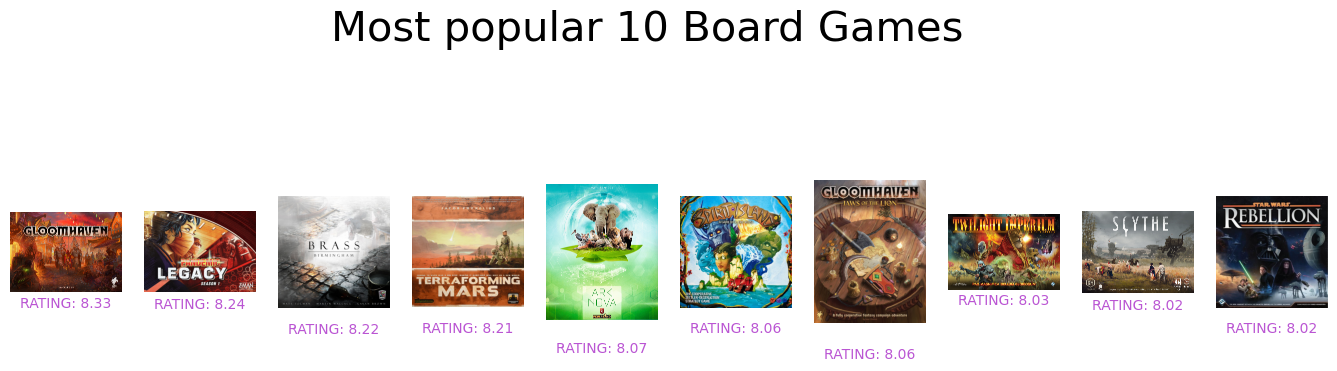

In [61]:
recs_top10=pd.DataFrame(popular_games(b_games,10))
fig,ax=plt.subplots(1,10,figsize=(17,5))
fig.suptitle("Most popular 10 Board Games",fontsize=30,color="black")
for i in range(len(recs_top10["boardgame_id"])):
    url=b_games.loc[b_games["boardgame_id"]==recs_top10["boardgame_id"][i],"image_link"][:1].values[0]
    img=Image.open(requests.get(url,stream=True).raw)
    ax[i].imshow(img)
    ax[i].axis("off")
    ax[i].set_title((f'RATING: {round(recs_top10["Popularity"][i], 2)}'),
                    y=-0.3,
                    color="mediumorchid",
                    fontsize=10)

In [17]:
class TimeRangeSplit():

    def __init__(self, 
                 start_date, 
                 end_date=None, 
                 freq='D', 
                 periods=None, 
                 tz=None, 
                 normalize=False, 
                 closed=None, 
                 train_min_date=None,
                 filter_cold_users=True, 
                 filter_cold_items=True, 
                 filter_already_seen=True):
        
        self.start_date = start_date
        if end_date is None and periods is None:
            raise ValueError("Either 'end_date' or 'periods' must be non-zero, not both at the same time.")

        self.end_date = end_date
        self.freq = freq
        self.periods = periods
        self.tz = tz
        self.normalize = normalize
        self.closed = closed
        self.train_min_date = pd.to_datetime(train_min_date, errors='raise')
        self.filter_cold_users = filter_cold_users
        self.filter_cold_items = filter_cold_items
        self.filter_already_seen = filter_already_seen

        self.date_range = pd.date_range(
            start=start_date, 
            end=end_date, 
            freq=freq, 
            periods=periods, 
            tz=tz, 
            normalize=normalize, 
            closed=closed)

        self.max_n_splits = max(0, len(self.date_range) - 1)
        if self.max_n_splits == 0:
            raise ValueError("Provided parametrs set an empty date range.") 

    def split(self, 
              df, 
              user_column='user_id',
              item_column='item_id',
              datetime_column='date',
              fold_stats=False):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            train_min_mask = df_datetime >= self.train_min_date
        else:
            train_min_mask = df_datetime.notnull()

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        for start, end in pairwise(date_range):
            fold_info = {
                'Start date': start,
                'End date': end
            }
            train_mask = train_min_mask & (df_datetime < start)
            train_idx = df.index[train_mask]
            if fold_stats:
                fold_info['Train'] = len(train_idx)

            test_mask = (df_datetime >= start) & (df_datetime < end)
            test_idx = df.index[test_mask]
            
            if self.filter_cold_users:
                new = np.setdiff1d(
                    df.loc[test_idx, user_column].unique(), 
                    df.loc[train_idx, user_column].unique())
                new_idx = df.index[test_mask & df[user_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New users'] = len(new)
                    fold_info['New users interactions'] = len(new_idx)

            if self.filter_cold_items:
                new = np.setdiff1d(
                    df.loc[test_idx, item_column].unique(), 
                    df.loc[train_idx, item_column].unique())
                new_idx = df.index[test_mask & df[item_column].isin(new)]
                test_idx = np.setdiff1d(test_idx, new_idx)
                test_mask = df.index.isin(test_idx)
                if fold_stats:
                    fold_info['New items'] = len(new)
                    fold_info['New items interactions'] = len(new_idx)

            if self.filter_already_seen:
                user_item = [user_column, item_column]
                train_pairs = df.loc[train_idx, user_item].set_index(user_item).index
                test_pairs = df.loc[test_idx, user_item].set_index(user_item).index
                intersection = train_pairs.intersection(test_pairs)
                test_idx = test_idx[~test_pairs.isin(intersection)]
                # test_mask = rd.df.index.isin(test_idx)
                if fold_stats:
                    fold_info['Known interactions'] = len(intersection)

            if fold_stats:
                fold_info['Test'] = len(test_idx)

            yield (train_idx, test_idx, fold_info)

    def get_n_splits(self, df, datetime_column='date'):
        df_datetime = df[datetime_column]
        if self.train_min_date is not None:
            df_datetime = df_datetime[df_datetime >= self.train_min_date]

        date_range = self.date_range[(self.date_range >= df_datetime.min()) & 
                                     (self.date_range <= df_datetime.max())]

        return max(0, len(date_range) - 1)

In [18]:
last_date = ratings['last_modified'].max().normalize() 
folds = 100
start_date = last_date - pd.Timedelta(days=folds)
start_date, last_date

(Timestamp('2022-10-29 00:00:00'), Timestamp('2023-02-06 00:00:00'))

In [19]:
cv = TimeRangeSplit(start_date=start_date, periods=folds+1)

cv.max_n_splits, cv.get_n_splits(ratings, datetime_column='last_modified')

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/4032697782.py:31: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  self.date_range = pd.date_range(


(100, 100)

In [20]:
cv.date_range

DatetimeIndex(['2022-10-29', '2022-10-30', '2022-10-31', '2022-11-01',
               '2022-11-02', '2022-11-03', '2022-11-04', '2022-11-05',
               '2022-11-06', '2022-11-07',
               ...
               '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31',
               '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-02-05', '2023-02-06'],
              dtype='datetime64[ns]', length=101, freq='D')

In [21]:
folds_with_stats = list(cv.split(
    ratings, 
    user_column='user_id',
    item_column='item_id',
    datetime_column='last_modified',
    fold_stats=True
))

folds_info_with_stats = pd.DataFrame([info for _, _, info in folds_with_stats])

In [22]:
fold_dates = [(info['Start date'], info['End date']) for _, _, info in folds_with_stats]
fold_dates

[(Timestamp('2022-10-29 00:00:00', freq='D'),
  Timestamp('2022-10-30 00:00:00', freq='D')),
 (Timestamp('2022-10-30 00:00:00', freq='D'),
  Timestamp('2022-10-31 00:00:00', freq='D')),
 (Timestamp('2022-10-31 00:00:00', freq='D'),
  Timestamp('2022-11-01 00:00:00', freq='D')),
 (Timestamp('2022-11-01 00:00:00', freq='D'),
  Timestamp('2022-11-02 00:00:00', freq='D')),
 (Timestamp('2022-11-02 00:00:00', freq='D'),
  Timestamp('2022-11-03 00:00:00', freq='D')),
 (Timestamp('2022-11-03 00:00:00', freq='D'),
  Timestamp('2022-11-04 00:00:00', freq='D')),
 (Timestamp('2022-11-04 00:00:00', freq='D'),
  Timestamp('2022-11-05 00:00:00', freq='D')),
 (Timestamp('2022-11-05 00:00:00', freq='D'),
  Timestamp('2022-11-06 00:00:00', freq='D')),
 (Timestamp('2022-11-06 00:00:00', freq='D'),
  Timestamp('2022-11-07 00:00:00', freq='D')),
 (Timestamp('2022-11-07 00:00:00', freq='D'),
  Timestamp('2022-11-08 00:00:00', freq='D')),
 (Timestamp('2022-11-08 00:00:00', freq='D'),
  Timestamp('2022-11-09 

In [23]:
recs_baseline = pd.DataFrame({'user_id': ratings['user_id'].unique()})
recs_baseline['item_id'] = [list(recs_top10['boardgame_id'].values) for i in range(len(recs_baseline))]
recs_baseline

,user_id,item_id
0,happyjosiah,"[174430, 161936, 224517, 167791, 342942, 16288..."
1,asaarto,"[174430, 161936, 224517, 167791, 342942, 16288..."
2,Christine Biancheria,"[174430, 161936, 224517, 167791, 342942, 16288..."
3,bitatmoonl,"[174430, 161936, 224517, 167791, 342942, 16288..."
4,DrGrayrock,"[174430, 161936, 224517, 167791, 342942, 16288..."
...,...,...
1627,lyxhope,"[174430, 161936, 224517, 167791, 342942, 16288..."
1628,Knecht Ruprecht,"[174430, 161936, 224517, 167791, 342942, 16288..."
1629,mac_s_1,"[174430, 161936, 224517, 167791, 342942, 16288..."
1630,marco27,"[174430, 161936, 224517, 167791, 342942, 16288..."


In [24]:
train_idx, test_idx, info = folds_with_stats[0]

train = ratings.loc[train_idx]
test = ratings.loc[test_idx]
train.shape, test.shape

((970756, 15), (489, 15))

In [25]:
recs_baseline = recs_baseline.explode('item_id')
recs_baseline['rank'] = recs_baseline.groupby('user_id').cumcount() + 1
test_recs_baseline = test.set_index(['user_id', 'item_id']).join(recs_baseline.set_index(['user_id', 'item_id']))
test_recs_baseline = test_recs_baseline.sort_values(by=['user_id', 'rank'])
test_recs_baseline['users_item_count'] = test_recs_baseline.groupby(level='user_id', sort=False)['rank'].transform(np.size)
test_recs_baseline['reciprocal_rank'] = 1 / test_recs_baseline['rank']
test_recs_baseline['reciprocal_rank'] = test_recs_baseline['reciprocal_rank'].fillna(0)
test_recs_baseline['cumulative_rank'] = test_recs_baseline.groupby(level='user_id').cumcount() + 1
test_recs_baseline['cumulative_rank'] = test_recs_baseline['cumulative_rank'] / test_recs_baseline['rank']

In [26]:
top_N = 10
result = {}
print('Метрики для бейзлайна')
users_count = test_recs_baseline.index.get_level_values('user_id').nunique()
for k in range(1, top_N + 1):
    hit_k = f'hit@{k}'
    test_recs_baseline[hit_k] = test_recs_baseline['rank'] <= k
    result[f'Precision@{k}'] = (test_recs_baseline[hit_k] / k).sum() / users_count
    result[f'Recall@{k}'] = (test_recs_baseline[hit_k] / test_recs_baseline['users_item_count']).sum() / users_count

result[f'MAP@{top_N}'] = (test_recs_baseline["cumulative_rank"] / test_recs_baseline["users_item_count"]).sum() / users_count
result[f'MRR'] = test_recs_baseline.groupby(level='user_id')['reciprocal_rank'].max().mean()

result = pd.Series(result)

print(result)

Метрики для бейзлайна
Precision@1     0.000000
Recall@1        0.000000
Precision@2     0.003268
Recall@2        0.000040
Precision@3     0.002179
Recall@3        0.000040
Precision@4     0.003268
Recall@4        0.006576
Precision@5     0.005229
Recall@5        0.013706
Precision@6     0.004357
Recall@6        0.013706
Precision@7     0.003735
Recall@7        0.013706
Precision@8     0.004902
Recall@8        0.022421
Precision@9     0.005084
Recall@9        0.023510
Precision@10    0.005229
Recall@10       0.025688
MAP@10          0.004726
MRR             0.009877
dtype: float64


**Подбираем лучшую модель**

*Item-to-item модель*

In [27]:
%%time
users_inv_mapping = dict(enumerate(ratings['user_id'].unique()))
users_mapping = {v: k for k, v in users_inv_mapping.items()}
len(users_mapping)

CPU times: user 55.1 ms, sys: 1.07 ms, total: 56.2 ms
Wall time: 54.6 ms


1632

In [28]:
items_inv_mapping = dict(enumerate(ratings['item_id'].unique()))
items_mapping = {v: k for k, v in items_inv_mapping.items()}
len(items_mapping)

1999

In [29]:
ratings['title'] = ratings['title'].str.lower()
b_games['title'] = b_games['title'].str.lower()

In [30]:
item_titles = pd.Series(ratings['title'].values, index=ratings['item_id']).to_dict()
len(item_titles), item_titles[432]

(1999, '6 nimmt!')

In [31]:
title_items = ratings.groupby('title')['item_id'].agg(list)
title_items

title
 珊瑚礁大戰                                                                       [12962]
'ολου του κόσμου τα αγαθά                                                   [183840]
0-9                                [217449, 217449, 217449, 217449, 217449, 21744...
01: большой пожар                                                           [100901]
1 nacht weerwolven & waaghalzen    [147949, 147949, 147949, 147949, 147949, 14794...
                                                         ...                        
할리우드 골든 에이지                                                                    [904]
해저탐험                                                                [169654, 169654]
화이트채플에서 온 편지                                                          [59959, 59959]
황금의 땅 엘도라도                                                                  [217372]
황혼의 투쟁                                                                [12333, 12333]
Name: item_id, Length: 8576, dtype: object

In [32]:
title_count = title_items.map(len)
title_count.value_counts()

1       2961
2        938
3        514
4        345
5        237
        ... 
469        1
1108       1
790        1
345        1
963        1
Name: item_id, Length: 969, dtype: int64

In [33]:
title_items[title_count > 1].head()

title
0-9                                          [217449, 217449, 217449, 217449, 217449, 21744...
1 nacht weerwolven & waaghalzen              [147949, 147949, 147949, 147949, 147949, 14794...
1 nacht weerwolven & waaghalzen: dageraad                     [163166, 163166, 163166, 163166]
100000 лет до нашей эры                                           [34635, 34635, 34635, 34635]
13 days: the cuban missile crisis, 1962      [177590, 177590, 177590, 177590, 177590, 17759...
Name: item_id, dtype: object

In [34]:
ratings['rating'] = np.array(ratings['rating'].values, dtype=np.float32)

ratings.loc[ratings['item_id'].isin([217449, 163166])].groupby('item_id').agg({
    'own': np.sum,
    'prevowned': np.sum,
    'fortrade': np.sum,
    'want': np.sum,
    'wanttoplay': np.sum,
    'wanttobuy': np.sum,
    'wishlist': np.sum,
    'preordered': np.sum,
    'rating': ['mean'],
    'last_modified': ['min', 'max'],
    
})


own prevowned fortrade want wanttoplay wanttobuy wishlist preordered  \
         sum       sum      sum  sum        sum       sum      sum        sum   
item_id                                                                         
163166   138        32        4    1          5         0        7          0   
217449   284       107        9    4          8         0       11          2   

           rating       last_modified                      
             mean                 min                 max  
item_id                                                    
163166   6.878872 2014-10-10 16:06:44 2023-02-05 08:56:00  
217449   6.534010 2017-02-03 03:28:28 2023-01-24 10:05:32

In [35]:
def compute_metrics(df_true, df_pred, top_N):
    result = {}
    test_recs = df_true.set_index(['user_id', 'item_id']).join(df_pred.set_index(['user_id', 'item_id']))
    test_recs = test_recs.sort_values(by=['user_id', 'rank'])

    test_recs['users_item_count'] = test_recs.groupby(level='user_id')['rank'].transform(np.size)
    test_recs['reciprocal_rank'] = (1 / test_recs['rank']).fillna(0)
    test_recs['cumulative_rank'] = test_recs.groupby(level='user_id').cumcount() + 1
    test_recs['cumulative_rank'] = test_recs['cumulative_rank'] / test_recs['rank']
    
    users_count = test_recs.index.get_level_values('user_id').nunique()
    for k in range(1, top_N + 1):
        hit_k = f'hit@{k}'
        test_recs[hit_k] = test_recs['rank'] <= k
        result[f'Precision@{k}'] = (test_recs[hit_k] / k).sum() / users_count
        result[f'Recall@{k}'] = (test_recs[hit_k] / test_recs['users_item_count']).sum() / users_count

    result[f'MAP@{top_N}'] = (test_recs["cumulative_rank"] / test_recs["users_item_count"]).sum() / users_count
    result[f'MRR'] = test_recs.groupby(level='user_id')['reciprocal_rank'].max().mean()
    return pd.Series(result)

In [36]:
def get_coo_matrix(df, 
                   user_col='user_id', 
                   item_col='item_id', 
                   weight_col=None, 
                   users_mapping=users_mapping, 
                   items_mapping=items_mapping):
    if weight_col is None:
        weights = np.ones(len(df), dtype=np.float32)
    else:
        weights = df[weight_col].astype(np.float32)

    interaction_matrix = sp.coo_matrix((
        weights, 
        (
            df[user_col].map(users_mapping.get), 
            df[item_col].map(items_mapping.get)
        )
    ))
    return interaction_matrix

In [37]:
from sklearn.preprocessing import normalize
train_mat = normalize(get_coo_matrix(train).tocsr())
train_mat

<1632x1999 sparse matrix of type '<class 'numpy.float32'>'
	with 960762 stored elements in Compressed Sparse Row format>

In [38]:
from implicit.nearest_neighbours import CosineRecommender, BM25Recommender, TFIDFRecommender

In [39]:
cosine_model = CosineRecommender(K=20)
cosine_model.fit(train_mat)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008451223373413086 seconds
  warnings.warn(


  0%|          | 0/1999 [00:00<?, ?it/s]

In [40]:
#тестовый пользователь
top_N = 10
user_id = test['user_id'].iloc[0]
row_id = users_mapping[user_id]
print(f'Рекомендации для пользователя {user_id}, номер строки - {row_id}')

Рекомендации для пользователя bionicman, номер строки - 11


In [41]:
recs = cosine_model.recommend(row_id, train_mat[row_id], N=top_N, filter_already_liked_items=True)
recs = pd.DataFrame(recs).T.rename(columns = {0: 'col_id', 1: 'similarity'})
recs

,col_id,similarity
0,391.0,10.672512
1,75.0,1.640046
2,69.0,1.135382
3,741.0,0.707077
4,715.0,0.694679
5,57.0,0.423305
6,171.0,0.307374
7,35.0,0.291903
8,272.0,0.290581
9,719.0,0.247073


In [42]:
recs['item_id'] = recs['col_id'].map(items_inv_mapping.get)
recs['title'] = recs['item_id'].map(item_titles.get)
recs

,col_id,similarity,item_id,title
0,391.0,10.672512,34635,stone age
1,75.0,1.640046,478,citadels
2,69.0,1.135382,18602,caylus
3,741.0,0.707077,21790,thurn and taxis
4,715.0,0.694679,8217,san juan
5,57.0,0.423305,41,can't stop
6,171.0,0.307374,9216,goa
7,35.0,0.291903,37111,battlestar galactica: the board game
8,272.0,0.290581,293014,nidavellir
9,719.0,0.247073,194655,santorini


In [43]:
def generate_implicit_recs_mapper(model, train_matrix, N, user_mapping, item_inv_mapping):
    def _recs_mapper(user):
        user_id = user_mapping[user]
        recs = model.recommend(user_id, 
                               train_matrix[user_id], 
                               N=N, 
                               filter_already_liked_items=True)
        return [item_inv_mapping[item] for item in recs[0]]
    return _recs_mapper

In [44]:
mapper = generate_implicit_recs_mapper(cosine_model, train_mat, top_N, users_mapping, items_inv_mapping)
mapper

<function __main__.generate_implicit_recs_mapper.<locals>._recs_mapper(user)>

In [45]:
%time
recs_cosine = pd.DataFrame({
    'user_id': test['user_id'].unique()
})
recs_cosine['item_id'] = recs_cosine['user_id'].map(mapper)
recs_cosine.head()

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 11 µs


,user_id,item_id
0,bionicman,"[34635, 478, 18602, 21790, 8217, 41, 9216, 371..."
1,Berengere,"[84876, 230802, 2651, 93, 281259, 283155, 555,..."
2,cito88,"[34635, 199561, 12942, 555, 295947, 308765, 24..."
3,Apparatus,"[126163, 120677, 9216, 132531, 176494, 54, 805..."
4,Adanedhel,"[555, 73439, 132531, 50, 25554, 176494, 22345,..."


In [46]:
recs_cosine = recs_cosine.explode('item_id')
recs_cosine['rank'] = recs_cosine.groupby('user_id').cumcount() + 1
recs_cosine.head(top_N + 2)

,user_id,item_id,rank
0,bionicman,34635,1
0,bionicman,478,2
0,bionicman,18602,3
0,bionicman,21790,4
0,bionicman,8217,5
0,bionicman,41,6
0,bionicman,9216,7
0,bionicman,37111,8
0,bionicman,293014,9
0,bionicman,194655,10


In [47]:
metrics = compute_metrics(test, recs_cosine, top_N)
metrics

Precision@1     0.039216
Recall@1        0.024432
Precision@2     0.039216
Recall@2        0.041693
Precision@3     0.034858
Recall@3        0.052150
Precision@4     0.029412
Recall@4        0.058686
Precision@5     0.026144
Recall@5        0.064133
Precision@6     0.025054
Recall@6        0.072343
Precision@7     0.022409
Recall@7        0.078879
Precision@8     0.021242
Recall@8        0.080553
Precision@9     0.023239
Recall@9        0.091023
Precision@10    0.023529
Recall@10       0.096737
MAP@10          0.045068
MRR             0.079783
dtype: float64

In [48]:
validation_results = pd.DataFrame()

for train_idx, test_idx, info in folds_with_stats:
    #print(f"test range - from {info['Start date']} to {info['End date']}")
    train = ratings.loc[train_idx]
    test = ratings.loc[test_idx]
    #print(f'train shape - {train.shape}, test shape - {test.shape}')
    
    recs_baseline = pd.DataFrame({'user_id': ratings['user_id'].unique()})
    recs_baseline['item_id'] = [list(recs_top10['boardgame_id'].values) for i in range(len(recs_baseline))]
    recs_baseline = recs_baseline.explode('item_id')
    recs_baseline['rank'] = recs_baseline.groupby('user_id').cumcount() + 1
    fold_result = compute_metrics(test, recs_baseline, top_N)
    fold_result.at['Date'] = info['Start date']
    fold_result.at['argv'] = 'none'
    fold_result.at['Model'] = 'baseline'
    validation_results = validation_results.append(fold_result, ignore_index=True)

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append me

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append me

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append me

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/88686487.py:17: FutureWarning: The frame.append me

In [49]:


for model_class in [CosineRecommender, BM25Recommender, TFIDFRecommender]:
    for train_idx, test_idx, info in folds_with_stats:
        #print(f"test range - from {info['Start date']} to {info['End date']}")
        train = ratings.loc[train_idx]
        test = ratings.loc[test_idx]
        #print(f'train shape - {train.shape}, test shape - {test.shape}')
        
        train_mat = get_coo_matrix(train).tocsr()
        
        model = model_class(K=20)
        model.fit(train_mat, show_progress=False) 

        mapper = generate_implicit_recs_mapper(model, train_mat, top_N, users_mapping, items_inv_mapping)

        recs = pd.DataFrame({
            'user_id': test['user_id'].unique()
        })
        recs['item_id'] = recs['user_id'].map(mapper)
        recs = recs.explode('item_id')
        recs['rank'] = recs.groupby('user_id').cumcount() + 1
        fold_result = compute_metrics(test, recs, top_N)
        fold_result.at['Date'] = info['Start date']
        fold_result.at['argv'] = 'K=20'
        fold_result.at['Model'] = model.__class__.__name__

        validation_results = validation_results.append(fold_result, ignore_index=True)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008268117904663086 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008268117904663086 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008388757705688477 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008367776870727539 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008488893508911133 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008404016494750977 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00850820541381836 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008496999740600586 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_r

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008584976196289062 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008567094802856445 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008580923080444336 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008396625518798828 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008460044860839844 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008408069610595703 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008517265319824219 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008519887924194336 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008521080017089844 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008562803268432617 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008629083633422852 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008587121963500977 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008322954177856445 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008316278457641602 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008306264877319336 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008380889892578125 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008450031280517578 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008451223373413086 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008507966995239258 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008469104766845703 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008480072021484375 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008547067642211914 seconds
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/351980789.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. C

In [50]:
validation_results

,Precision@1,Recall@1,Precision@2,Recall@2,Precision@3,Recall@3,Precision@4,Recall@4,Precision@5,Recall@5,...,Recall@8,Precision@9,Recall@9,Precision@10,Recall@10,MAP@10,MRR,Date,argv,Model
0,0.000000,0.000000,0.003268,0.000040,0.002179,0.000040,0.003268,0.006576,0.005229,0.013706,...,0.022421,0.005084,0.023510,0.005229,0.025688,0.004726,0.009877,2022-10-29,none,baseline
1,0.000000,0.000000,0.000000,0.000000,0.002283,0.000086,0.003425,0.003510,0.004110,0.006935,...,0.020634,0.004566,0.020634,0.004110,0.020634,0.003853,0.008790,2022-10-30,none,baseline
2,0.000000,0.000000,0.000000,0.000000,0.002347,0.007042,0.001761,0.007042,0.001408,0.007042,...,0.014085,0.001565,0.014085,0.001408,0.014085,0.003353,0.003353,2022-10-31,none,baseline
3,0.000000,0.000000,0.007634,0.004907,0.005089,0.004907,0.003817,0.004907,0.003053,0.004907,...,0.014449,0.004241,0.022083,0.003817,0.022083,0.004665,0.010663,2022-11-01,none,baseline
4,0.000000,0.000000,0.003759,0.007519,0.005013,0.015038,0.003759,0.015038,0.006015,0.030075,...,0.030075,0.003342,0.030075,0.003008,0.030075,0.009273,0.009273,2022-11-02,none,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.066667,0.001258,0.033333,0.001258,0.044444,0.023480,0.033333,0.023480,0.040000,0.024738,...,0.024738,0.022222,0.024738,0.020000,0.024738,0.009168,0.088889,2023-02-01,K=20,TFIDFRecommender
396,0.090909,0.090909,0.045455,0.090909,0.030303,0.090909,0.022727,0.090909,0.018182,0.090909,...,0.090909,0.010101,0.090909,0.009091,0.090909,0.090909,0.090909,2023-02-02,K=20,TFIDFRecommender
397,0.166667,0.009259,0.166667,0.018519,0.111111,0.018519,0.125000,0.027778,0.100000,0.027778,...,0.027778,0.055556,0.027778,0.050000,0.027778,0.025463,0.166667,2023-02-03,K=20,TFIDFRecommender
398,0.000000,0.000000,0.100000,0.200000,0.066667,0.200000,0.050000,0.200000,0.040000,0.200000,...,0.200000,0.022222,0.200000,0.020000,0.200000,0.100000,0.100000,2023-02-04,K=20,TFIDFRecommender


In [51]:
validation_results.groupby(['Model', 'argv']).agg({
    'MRR': ['mean', 'std', 'min', 'max'],
    'MAP@10': ['mean', 'std', 'min', 'max'],
    'Recall@10': ['mean', 'std', 'min', 'max'],
})

MRR                             MAP@10            \
                            mean       std  min       max      mean       std   
Model             argv                                                          
BM25Recommender   K=20  0.088219  0.030291  0.0  0.166667  0.046841  0.019802   
CosineRecommender K=20  0.085690  0.029579  0.0  0.166667  0.045138  0.019515   
TFIDFRecommender  K=20  0.086962  0.030621  0.0  0.179917  0.045790  0.019671   
baseline          none  0.011310  0.008966  0.0  0.036818  0.004896  0.005059   

                                      Recall@10                           
                        min       max      mean       std  min       max  
Model             argv                                                    
BM25Recommender   K=20  0.0  0.103125  0.102741  0.036650  0.0  0.205353  
CosineRecommender K=20  0.0  0.103776  0.100198  0.038964  0.0  0.213097  
TFIDFRecommender  K=20  0.0  0.105208  0.100741  0.037555  0.0  0.205353  
baseline          none  0.0  0.028395  0.017356  0.013879  0.0  0.091986

In [52]:
def get_similar_games(title, model, N=10, idx=0, 
                      title_items=title_items, item_titles=item_titles, items_mapping=items_mapping, items_inv_mapping=items_inv_mapping):
    item_ids = title_items.at[title]
    if len(item_ids) == 1:
        item_id = item_ids[0]
    else:
        item_id = item_ids[idx]
    
    col_id = items_mapping[item_id]
    similar = model.similar_items(col_id, N=N+1)
    similar = pd.DataFrame({'col_id':similar[0], 'similarity':similar[1]})
    similar['item_id'] = similar['col_id'].map(items_inv_mapping.get)
    similar['title'] = similar['item_id'].map(item_titles.get)
    
    fig,ax=plt.subplots(1,N,figsize=(17,5))
    fig.suptitle("You may also like these games",fontsize=40,color="chocolate")
    for i in range(1, N+1):
                url=b_games.loc[b_games["boardgame_id"]==similar['item_id'][i],"image_link"][:1].values[0]
                rating = b_games.loc[b_games["boardgame_id"]==similar['item_id'][i],"average_rating"][:1].values[0]
                img=Image.open(requests.get(url,stream=True).raw)
                ax[i-1].imshow(img)
                ax[i-1].axis("off")
                ax[i-1].set_title((f'{similar["title"][i]} \n Rating: {rating:.3}'),
                    y=-0.4,
                    color="mediumorchid",
                    fontsize=10)
    return similar
    

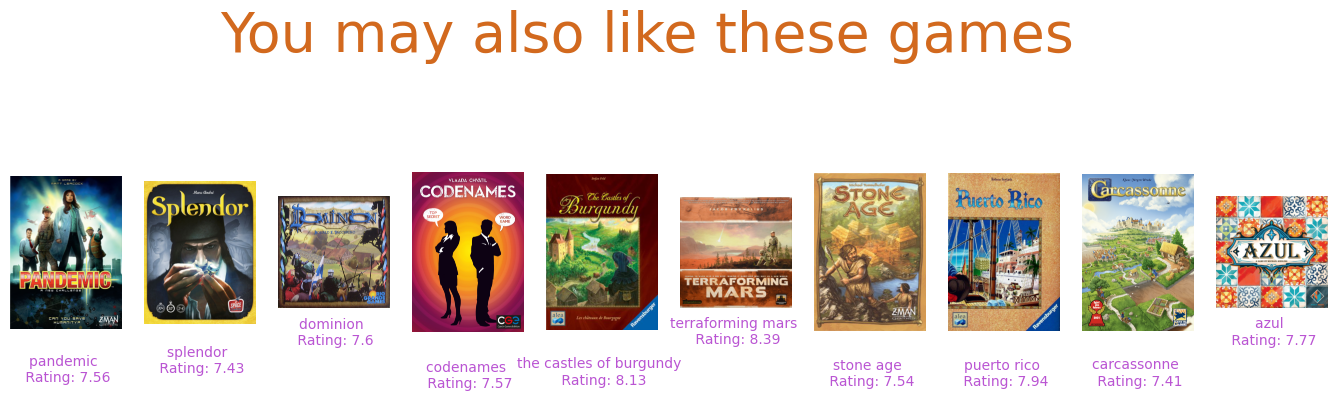

In [53]:
similar = get_similar_games('7 wonders', model)

In [54]:
from implicit.als import AlternatingLeastSquares

In [55]:
for train_idx, test_idx, info in folds_with_stats:
    #print(f"test range - from {info['Start date']} to {info['End date']}")
    train = ratings.loc[train_idx]
    test = ratings.loc[test_idx]
    #print(f'train shape - {train.shape}, test shape - {test.shape}')
    
    train_mat = get_coo_matrix(train).tocsr()
    
    als_model = AlternatingLeastSquares(factors=32, iterations=30, num_threads=4)
    als_model.fit(train_mat, show_progress=False) 
    
    mapper = generate_implicit_recs_mapper(als_model, train_mat, top_N, users_mapping, items_inv_mapping)
    
    recs = pd.DataFrame({
        'user_id': test['user_id'].unique()
    })
    recs['item_id'] = recs['user_id'].map(mapper)
    recs = recs.explode('item_id')
    recs['rank'] = recs.groupby('user_id').cumcount() + 1
    metrics = compute_metrics(test, recs, top_N)
    
    fold_result = pd.Series(metrics)
    fold_result.at['Date'] = info['Start date']
    fold_result.at['argv'] = 'factors=32 iterations=30'
    fold_result.at['Model'] = als_model.__class__.__name__
    
    validation_results = validation_results.append(fold_result, ignore_index=True)

/Users/katerina_dracheva/opt/anaconda3/lib/python3.9/site-packages/implicit/utils.py:33: UserWarning: Intel MKL BLAS detected. Its highly recommend to set the environment variable 'export MKL_NUM_THREADS=1' to disable its internal multithreading
  warnings.warn(
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will b

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.appen

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.appen

/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  validation_results = validation_results.append(fold_result, ignore_index=True)
/var/folders/s3/z8mlrg3n24z5b_6mmph65y7w0000gn/T/ipykernel_20986/471018114.py:27: FutureWarning: The frame.appen

In [56]:
validation_results

,Precision@1,Recall@1,Precision@2,Recall@2,Precision@3,Recall@3,Precision@4,Recall@4,Precision@5,Recall@5,...,Recall@8,Precision@9,Recall@9,Precision@10,Recall@10,MAP@10,MRR,Date,argv,Model
0,0.0,0.0,0.003268,0.000040,0.002179,0.000040,0.003268,0.006576,0.005229,0.013706,...,0.022421,0.005084,0.023510,0.005229,0.025688,0.004726,0.009877,2022-10-29,none,baseline
1,0.0,0.0,0.000000,0.000000,0.002283,0.000086,0.003425,0.003510,0.004110,0.006935,...,0.020634,0.004566,0.020634,0.004110,0.020634,0.003853,0.008790,2022-10-30,none,baseline
2,0.0,0.0,0.000000,0.000000,0.002347,0.007042,0.001761,0.007042,0.001408,0.007042,...,0.014085,0.001565,0.014085,0.001408,0.014085,0.003353,0.003353,2022-10-31,none,baseline
3,0.0,0.0,0.007634,0.004907,0.005089,0.004907,0.003817,0.004907,0.003053,0.004907,...,0.014449,0.004241,0.022083,0.003817,0.022083,0.004665,0.010663,2022-11-01,none,baseline
4,0.0,0.0,0.003759,0.007519,0.005013,0.015038,0.003759,0.015038,0.006015,0.030075,...,0.030075,0.003342,0.030075,0.003008,0.030075,0.009273,0.009273,2022-11-02,none,baseline
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.033333,0.022222,0.044444,0.023480,0.033333,0.023480,0.026667,0.023480,...,0.058071,0.037037,0.080294,0.033333,0.080294,0.018481,0.071296,2023-02-01,factors=32 iterations=30,AlternatingLeastSquares
496,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022727,0.010101,0.022727,0.018182,0.113636,0.012338,0.022078,2023-02-02,factors=32 iterations=30,AlternatingLeastSquares
497,0.0,0.0,0.083333,0.009259,0.111111,0.018519,0.125000,0.027778,0.100000,0.027778,...,0.061111,0.074074,0.061111,0.066667,0.061111,0.021914,0.104167,2023-02-03,factors=32 iterations=30,AlternatingLeastSquares
498,0.2,0.2,0.100000,0.200000,0.066667,0.200000,0.050000,0.200000,0.040000,0.200000,...,0.400000,0.044444,0.400000,0.040000,0.400000,0.228571,0.228571,2023-02-04,factors=32 iterations=30,AlternatingLeastSquares


In [57]:
validation_results.groupby(['Model', 'argv']).agg({
    'MRR': ['mean', 'std', 'min', 'max'],
    'MAP@10': ['mean', 'std', 'min', 'max'],
    'Recall@10': ['mean', 'std', 'min', 'max'],
})

MRR                 \
                                                      mean       std  min   
Model                   argv                                                
AlternatingLeastSquares factors=32 iterations=30  0.100187  0.036010  0.0   
BM25Recommender         K=20                      0.088219  0.030291  0.0   
CosineRecommender       K=20                      0.085690  0.029579  0.0   
TFIDFRecommender        K=20                      0.086962  0.030621  0.0   
baseline                none                      0.011310  0.008966  0.0   

                                                              MAP@10  \
                                                       max      mean   
Model                   argv                                           
AlternatingLeastSquares factors=32 iterations=30  0.230081  0.054186   
BM25Recommender         K=20                      0.166667  0.046841   
CosineRecommender       K=20                      0.166667  0.045138   
TFIDFRecommender        K=20                      0.179917  0.045790   
baseline                none                      0.036818  0.004896   

                                                                           \
                                                       std  min       max   
Model                   argv                                                
AlternatingLeastSquares factors=32 iterations=30  0.026993  0.0  0.228571   
BM25Recommender         K=20                      0.019802  0.0  0.103125   
CosineRecommender       K=20                      0.019515  0.0  0.103776   
TFIDFRecommender        K=20                      0.019671  0.0  0.105208   
baseline                none                      0.005059  0.0  0.028395   

                                                 Recall@10                 \
                                                      mean       std  min   
Model                   argv                                                
AlternatingLeastSquares factors=32 iterations=30  0.118853  0.044484  0.0   
BM25Recommender         K=20                      0.102741  0.036650  0.0   
CosineRecommender       K=20                      0.100198  0.038964  0.0   
TFIDFRecommender        K=20                      0.100741  0.037555  0.0   
baseline                none                      0.017356  0.013879  0.0   

                                                            
                                                       max  
Model                   argv                                
AlternatingLeastSquares factors=32 iterations=30  0.400000  
BM25Recommender         K=20                      0.205353  
CosineRecommender       K=20                      0.213097  
TFIDFRecommender        K=20                      0.205353  
baseline                none                      0.091986

,col_id,similarity,item_id,title
0,391,1.000000,34635,stone age
1,2,0.966431,68448,7 wonders
2,376,0.964389,148228,splendor
3,286,0.962835,30549,pandemic
4,121,0.962330,36218,dominion
5,310,0.957086,3076,puerto rico
6,60,0.953032,822,carcassonne
7,63,0.949623,84876,the castles of burgundy
8,9,0.947312,31260,agricola
9,355,0.946968,13,catan


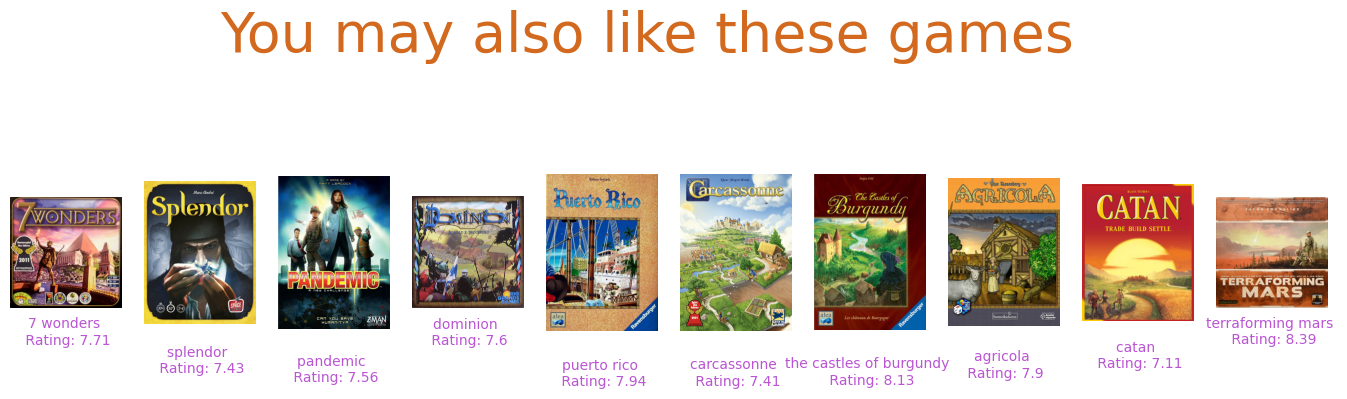

In [58]:
get_similar_games('stone age', als_model)

In [59]:
similar_users = als_model.similar_users(0, N=5)
similar_users

(array([   0, 1474,  973,  720, 1077], dtype=int32),
 array([1.0000001 , 0.87579876, 0.85417616, 0.8284014 , 0.8262727 ],
       dtype=float32))

In [60]:
similar_users = als_model.similar_users(453, N=5)

for uid, sim in zip(similar_users[0], similar_users[1]):

    user_id = users_inv_mapping[uid]
    print(f'User ID - {user_id} ({sim:.4f})')
    user_mask = train['user_id'] == user_id
    user_items = train.loc[user_mask, 'item_id'].map(item_titles.get)
    print(f'number of user items - {len(user_items)}')

User ID - paul10liao (1.0000)
number of user items - 1082
User ID - pboivin (0.8648)
number of user items - 1058
User ID - Pozman (0.8596)
number of user items - 1124
User ID - Joep83 (0.8544)
number of user items - 959
User ID - LookAtTheBacon (0.8534)
number of user items - 908
